# Sentiment Classification with spaCy

In [1]:
import pandas as pd
import numpy as np
import string
import spacy
import random
import seaborn as sns

In [3]:
data_train = pd.read_table('training_data.txt', sep=",")
data_train

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


In [5]:
np.unique(data_train['emocao'], return_counts=True)

(array(['alegria', 'medo'], dtype=object), array([112,  84], dtype=int64))

# Pre-processing data

In [6]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
from spacy.lang.pt.stop_words import STOP_WORDS

stop_words = STOP_WORDS
stop_words

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [11]:
nlp = spacy.load('pt_core_news_sm')

In [26]:
def preprocessing(text):
    text = text.lower()
    document = nlp(text)
    
    list = []
    for token in document:
        list.append(token.lemma_)

    list = [word for word in list if word not in stop_words and word not in punctuation]
    list = ' '.join([str(element) for element in list if not element.isdigit()])
    return list



In [27]:
test = preprocessing("Estou aPrendendo processamento de linguagem Natural, curso em São Paulo 24 de 07 de 2024")
test

'aprender processamento linguagem natural curso São Paulo'

## Cleaning data

In [28]:
data_train.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [29]:
data_train['texto2'] = data_train['texto'].apply(preprocessing)

In [30]:
data_train.head(10)

,texto,emocao,texto2
0,este trabalho é agradável,alegria,trabalho agradável
1,gosto de ficar no seu aconchego,alegria,gosto ficar em o aconchego
2,fiz a adesão ao curso hoje,alegria,fiz adesão a o curso hoje
3,eu sou admirada por muitos,alegria,admirar
4,adoro como você,alegria,adorar
5,adoro seu cabelo macio,alegria,adorar cabelo macio
6,adoro a cor dos seus olhos,alegria,adorar cor de o olho
7,somo tão amáveis um com o outro,alegria,somo amável outro
8,sinto uma grande afeição por ele,alegria,sinto afeição
9,quero agradar meus filhos,alegria,querer agradar filho


## Treating class

In [34]:
data_train_final = []

for text, emotion in zip(data_train['texto2'], data_train['emocao']):
    #print(text, emotion)

    if emotion == 'alegria':
        dict = ({'Alegria': True, "Medo": False})
    else:
        dict = ({'Alegria': False, "Medo": True})
    
    data_train_final.append([text,dict.copy()])

data_train_final

[['trabalho agradável', {'Alegria': True, 'Medo': False}],
 ['gosto ficar em o aconchego', {'Alegria': True, 'Medo': False}],
 ['fiz adesão a o curso hoje', {'Alegria': True, 'Medo': False}],
 ['admirar', {'Alegria': True, 'Medo': False}],
 ['adorar', {'Alegria': True, 'Medo': False}],
 ['adorar cabelo macio', {'Alegria': True, 'Medo': False}],
 ['adorar cor de o olho', {'Alegria': True, 'Medo': False}],
 ['somo amável outro', {'Alegria': True, 'Medo': False}],
 ['sinto afeição', {'Alegria': True, 'Medo': False}],
 ['querer agradar filho', {'Alegria': True, 'Medo': False}],
 ['sinto completamente amar', {'Alegria': True, 'Medo': False}],
 ['amo', {'Alegria': True, 'Medo': False}],
 ['alívio', {'Alegria': True, 'Medo': False}],
 ['dor amenizar finalmente', {'Alegria': True, 'Medo': False}],
 ['achar apaixoneir', {'Alegria': True, 'Medo': False}],
 ['amar maravilhoso', {'Alegria': True, 'Medo': False}],
 ['sentir animar', {'Alegria': True, 'Medo': False}],
 ['sintar hoje', {'Alegria': Tr

In [35]:
len(data_train_final)

196

# Classification

In [95]:
from spacy.training import Example

In [117]:
model = spacy.blank('pt')
textcat = model.add_pipe('textcat')
textcat.add_label("Alegria")
textcat.add_label("Medo")
#model.add_pipe('textcat')
history = []

In [119]:
model.begin_training()

for era in range(500):
    random.shuffle(data_train_final)
    losses = {}
    for batch in spacy.util.minibatch(data_train_final,30):
        texts = [model(text) for text, entities in batch]
        annotations = [{'cats': entities} for text, entities in batch]
        examples = [Example.from_dict(doc,annotation) for doc, annotation in zip(texts, annotations)]
        #print(examples)
        model.update(examples, losses=losses)
    
    if era % 100 ==0:
        print(losses)
        history.append(losses)

{'textcat': 1.7198767513036728}
{'textcat': 4.7377769676199e-11}
{'textcat': 5.607900320329928e-12}
{'textcat': 1.3301888379029046e-12}
{'textcat': 4.681043337103957e-13}


In [120]:
history_loss = []
for i in history:
  history_loss.append(i.get('textcat'))

In [121]:
history_loss = np.array(history_loss)
history_loss

array([1.72583732e+00, 2.24699298e-11, 3.11857375e-12, 8.42764382e-13,
       2.93599822e-13, 1.71987675e+00, 4.73777697e-11, 5.60790032e-12,
       1.33018884e-12, 4.68104334e-13])

Text(0, 0.5, 'Loss')

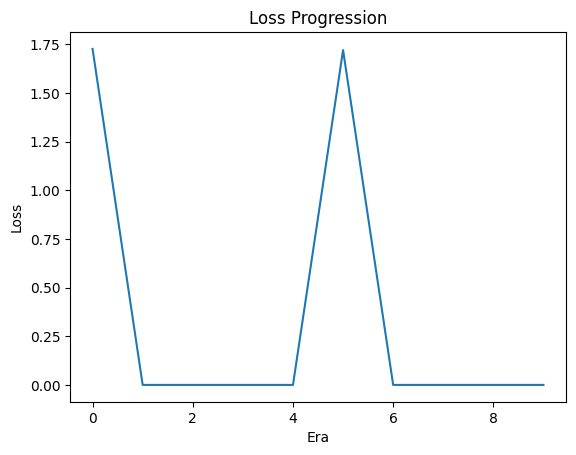

In [122]:
import matplotlib.pyplot as plt
plt.plot(history_loss)
plt.title('Loss Progression')
plt.xlabel('Era')
plt.ylabel('Loss')

In [123]:
model.to_disk("model_sentiment_class")

In [126]:
model_load = spacy.load('model_sentiment_class')
model_load

In [127]:
positive_text = "eu adoro a cor dos seus olhos"
positive_text = preprocessing(positive_text)
positive_text

'adorar cor de o olho'

In [128]:
predict = model_load(positive_text)
predict.cats

{'Alegria': 0.9999998807907104, 'Medo': 8.038063015192165e-08}

In [129]:
negative_text = "eu odeio ele"
negative_text = preprocessing(negative_text)
negative_text

'odeiar'

In [130]:
predict = model_load(negative_text)
predict.cats

{'Alegria': 0.0014142267173156142, 'Medo': 0.9985858201980591}

# Model evaluation

## Training data

In [131]:
predictions = []

for text in data_train['texto2']:
    predict = model_load(text)
    predictions.append(predict.cats)

predictions

[{'Alegria': 0.9999998807907104, 'Medo': 7.583319927562115e-08},
 {'Alegria': 0.9999998807907104, 'Medo': 1.1620489459573946e-07},
 {'Alegria': 1.0, 'Medo': 3.2413467465630674e-08},
 {'Alegria': 1.0, 'Medo': 4.391911900825107e-08},
 {'Alegria': 1.0, 'Medo': 1.3456467051753407e-08},
 {'Alegria': 1.0, 'Medo': 2.150964739655592e-08},
 {'Alegria': 0.9999998807907104, 'Medo': 8.038063015192165e-08},
 {'Alegria': 0.9999998807907104, 'Medo': 1.4321881280920934e-07},
 {'Alegria': 1.0, 'Medo': 1.2067960852846227e-08},
 {'Alegria': 0.9999998807907104, 'Medo': 1.7057456602742604e-07},
 {'Alegria': 1.0, 'Medo': 2.538292420695143e-08},
 {'Alegria': 1.0, 'Medo': 1.7880795510905045e-08},
 {'Alegria': 1.0, 'Medo': 1.296257412519708e-08},
 {'Alegria': 1.0, 'Medo': 4.184489910130651e-08},
 {'Alegria': 0.9999997615814209, 'Medo': 1.8296489656677295e-07},
 {'Alegria': 1.0, 'Medo': 4.998788227794648e-08},
 {'Alegria': 1.0, 'Medo': 2.65727813086869e-08},
 {'Alegria': 1.0, 'Medo': 1.2245173763858475e-08},
 {

In [137]:
final_predictions = []

for predict in predictions:
    if predict['Alegria'] > predict['Medo']:
        final_predictions.append('alegria')
    else:
        final_predictions.append('medo')

final_predictions = np.array(final_predictions)
final_predictions

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [138]:
np.unique(final_predictions, return_counts=True)

(array(['alegria', 'medo'], dtype='<U7'), array([112,  84], dtype=int64))

In [134]:
np.unique(data_train['emocao'], return_counts=True)

(array(['alegria', 'medo'], dtype=object), array([112,  84], dtype=int64))

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [139]:
accuracy_score(data_train['emocao'],final_predictions)

1.0

In [140]:
confusion_matrix(data_train['emocao'],final_predictions)

array([[112,   0],
       [  0,  84]], dtype=int64)

Model is overfitting

## Test data

In [141]:
test_data = pd.read_table('test_data.txt', sep=",")
test_data

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria
...,...,...
79,fui notificado e estou com medo de perder a gu...,medo
80,estou angustiada com meus filhos na rua,medo
81,e abominável o que fazem com os animais,medo
82,foi terrível o tigre quase o matou,medo


In [142]:
test_data['texto2'] = test_data['texto'].apply(preprocessing)

In [143]:
test_data

,texto,emocao,texto2
0,não precisei pagar o ingresso,alegria,precisar pagar ingresso
1,se eu ajeitar tudo fica bem,alegria,ajeitar ficar
2,minha fortuna ultrapassará a sua,alegria,fortuna ultrapassar
3,sou muito afortunado,alegria,afortunar
4,é benéfico para todos esta nova medida,alegria,benéfico medida
...,...,...,...
79,fui notificado e estou com medo de perder a gu...,medo,notificar medo perder guarda de o filha
80,estou angustiada com meus filhos na rua,medo,angustiada filho em o rua
81,e abominável o que fazem com os animais,medo,abominável animal
82,foi terrível o tigre quase o matou,medo,terrível tigre quase matar


In [144]:
predictions = []

for text in test_data['texto2']:
    predict = model_load(text)
    predictions.append(predict.cats)

predictions

[{'Alegria': 6.46396802039817e-06, 'Medo': 0.9999935626983643},
 {'Alegria': 0.9999772310256958, 'Medo': 2.276668783451896e-05},
 {'Alegria': 0.9999107122421265, 'Medo': 8.931032061809674e-05},
 {'Alegria': 1.0, 'Medo': 4.7133621450257124e-08},
 {'Alegria': 0.9999910593032837, 'Medo': 8.896448889572639e-06},
 {'Alegria': 0.9999951124191284, 'Medo': 4.942859504808439e-06},
 {'Alegria': 0.00024871528148651123, 'Medo': 0.9997512698173523},
 {'Alegria': 0.9999986886978149, 'Medo': 1.332317765445623e-06},
 {'Alegria': 0.9999997615814209, 'Medo': 2.6403714059597405e-07},
 {'Alegria': 0.25589513778686523, 'Medo': 0.7441048622131348},
 {'Alegria': 0.003403755836188793, 'Medo': 0.9965962767601013},
 {'Alegria': 0.0008683904889039695, 'Medo': 0.9991316199302673},
 {'Alegria': 0.0038737421855330467, 'Medo': 0.9961262345314026},
 {'Alegria': 0.9833373427391052, 'Medo': 0.016662664711475372},
 {'Alegria': 1.0, 'Medo': 1.4681210025457858e-08},
 {'Alegria': 0.0003431763034313917, 'Medo': 0.9996567964

In [145]:
final_predictions = []

for predict in predictions:
    if predict['Alegria'] > predict['Medo']:
        final_predictions.append('alegria')
    else:
        final_predictions.append('medo')

final_predictions = np.array(final_predictions)
final_predictions

array(['medo', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'alegria', 'alegria', 'medo', 'medo', 'medo', 'medo',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'medo', 'medo',
       'alegria', 'medo', 'medo', 'alegria', 'medo', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'alegria', 'alegria', 'alegria', 'medo',
       'alegria', 'medo', 'alegria', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'alegria',
       'alegria', 'medo', 'alegria', 'alegria', 'medo', 'medo', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'medo', 'alegria', 'medo',
       'alegria', 'alegria', 'medo', 'medo', 'medo', 'medo', 'alegria',
       'medo', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'alegria', 'alegria', 'medo', 'alegria'], dtype='<U7')

In [146]:
accuracy_score(test_data['emocao'],final_predictions)

0.5476190476190477

In [147]:
confusion_matrix(test_data['emocao'],final_predictions)

array([[28, 20],
       [18, 18]], dtype=int64)